In [18]:
base_dir = './Numerical_BanglaLekhaIsolated'

In [19]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam

path='./Numerical_BanglaLekhaIsolated'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(28,28,3)

In [20]:
myList=os.listdir(path)

numOfClasses=len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
    myPicList=os.listdir(path+"/"+str(x))
    for y in myPicList:
        try:
            curImg=cv2.imread(path+"/"+str(x)+"/"+y)
            curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
            images.append(curImg)
            classNo.append(x)
        except:
            pass
    print(x)

images=np.array(images)
classNo=np.array(classNo)

Importing Classes..........
0
1
2
3
4
5
6
7
8
9


In [21]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

In [22]:
y_train

array([3, 3, 8, ..., 4, 4, 9])

In [23]:
x_train

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[255, 255, 255],
         [ 42,  42,  42],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

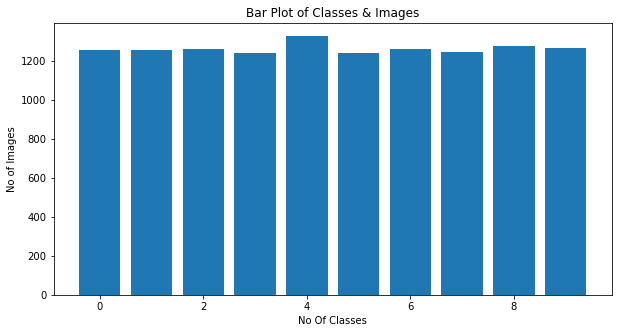

In [24]:
numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [25]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
	return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

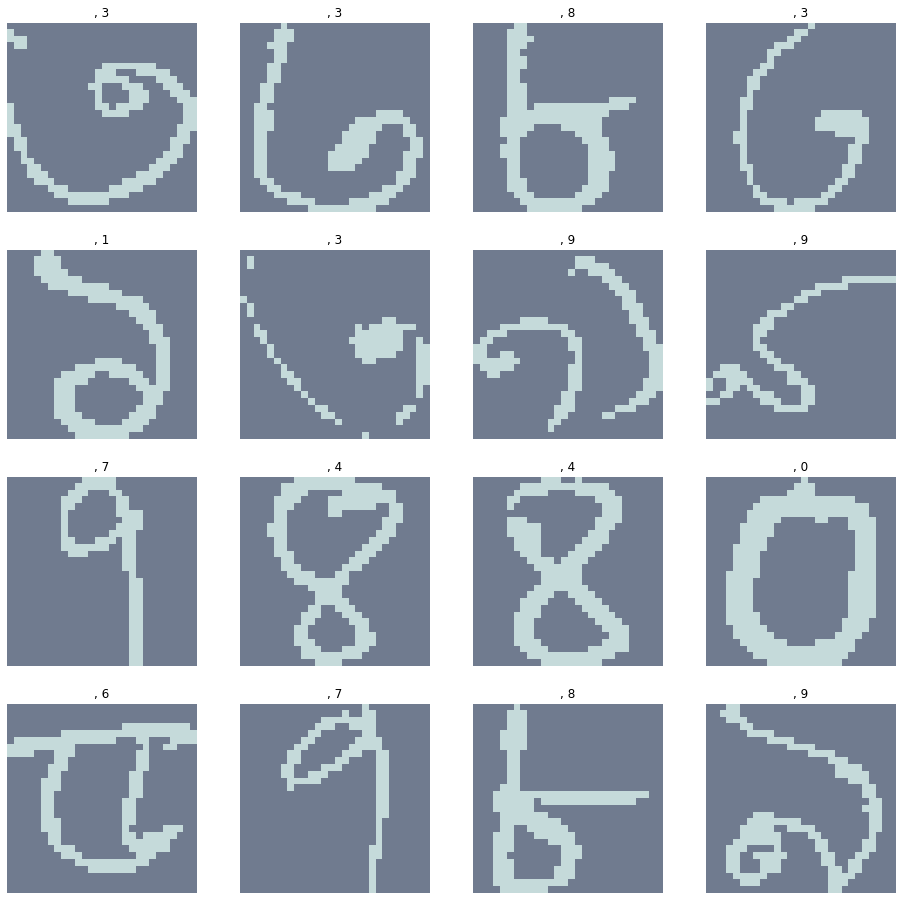

In [26]:

def plotImagesAndLabels():
    t_x, t_y = x_train, y_train
    fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        c_ax.imshow(c_x[:,:], cmap = 'bone', vmin = -1.5, vmax = 1.5)
        c_ax.set_title(', '+str(c_y))
        c_ax.axis('off')
plotImagesAndLabels()

In [27]:

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)


In [28]:
import pandas as pd  

print("Total number of training images: ",len(x_train))

# make train_image_names as serie object
#x_train = pd.Series(x_train)

print("total number of test images:",len(x_test))
print("total number of validition images:",len(x_validation))

print("total number in the datasets images:",len(images))

Total number of training images:  12638
total number of test images: 3950
total number of validition images: 3160
total number in the datasets images: 19748


In [29]:
def model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer
  model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))

  # convolutional layer 2
  model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  #convolution layer 3
  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  # flatten output of conv
  model.add(Flatten())

  # hidden layer
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  # output layer
  model.add(Dense(10, activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model = model()


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [31]:
history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=86),
	steps_per_epoch=len(x_train)//86,
	epochs=50,
	validation_data=(x_validation,y_validation),
	shuffle=1)

#model.save("MathNNet.h5")

Epoch 1/50
146/146 [==============================] - 54s 361ms/step - loss: 0.8816 - accuracy: 0.7040 - val_loss: 0.2444 - val_accuracy: 0.9237
Epoch 2/50
146/146 [==============================] - 52s 357ms/step - loss: 0.3962 - accuracy: 0.8699 - val_loss: 0.1691 - val_accuracy: 0.9484
Epoch 3/50
146/146 [==============================] - 52s 355ms/step - loss: 0.3153 - accuracy: 0.8978 - val_loss: 0.1418 - val_accuracy: 0.9585
Epoch 4/50
146/146 [==============================] - 52s 358ms/step - loss: 0.2654 - accuracy: 0.9136 - val_loss: 0.1298 - val_accuracy: 0.9620
Epoch 5/50
146/146 [==============================] - 53s 363ms/step - loss: 0.2432 - accuracy: 0.9200 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 6/50
146/146 [==============================] - 53s 364ms/step - loss: 0.2170 - accuracy: 0.9308 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 7/50
146/146 [==============================] - 55s 377ms/step - loss: 0.2046 - accuracy: 0.9352 - val_loss: 0.1107 - val_ac

(399, 28, 28, 1)


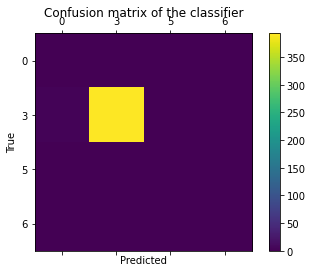

0.9849624060150376


In [32]:
from sklearn.metrics import confusion_matrix

check_class = 3
class_x_test = []
class_y_test = []
temp = np.argmax(y_test,axis=1)
for i, x in enumerate(temp):
  if x == check_class:
    for j, y in enumerate(x_test):
      if j == i:
        class_x_test.append(y)
    class_y_test.append(check_class)

class_x_test = np.asarray(class_x_test)
# class wise accuracy
print(class_x_test.shape)
class_y_pred = model.predict(class_x_test)
class_y_pred = np.argmax(class_y_pred,axis=1)

labels = list(set(class_y_pred))
cm = confusion_matrix(class_y_test, class_y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

from sklearn.metrics import accuracy_score
acc = accuracy_score(class_y_test, class_y_pred)
print(acc)

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred_t = np.argmax(y_pred,axis=1)
y_pred_t

array([2, 4, 3, ..., 2, 8, 4], dtype=int64)

In [35]:
y_test_t = np.argmax(y_test,axis=1)
y_test_t

array([2, 4, 3, ..., 2, 8, 4], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_t, y_pred_t)

In [37]:
conf_mat

array([[395,   1,   1,   3,   0,   3,   0,   1,   0,   0],
       [  0, 382,   3,   0,   0,   0,   0,   0,   0,   4],
       [  0,   0, 382,   0,   0,   1,   0,   0,   3,   0],
       [  4,   0,   0, 393,   0,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0, 357,   2,   0,   1,   0,   1],
       [  0,   2,   0,   3,   0, 420,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,  16, 365,   0,   0,   0],
       [  1,   0,   1,   0,   1,   1,   0, 426,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   1, 388,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,   0, 381]], dtype=int64)

In [38]:
#train accuracy
y_pred_train = model.predict(x_train)

y_pred_train_acc = np.argmax(y_pred_train,axis=1)
y_pred_train_acc

y_test_train = np.argmax(y_train,axis=1)
y_test_train

array([3, 3, 8, ..., 4, 4, 9], dtype=int64)

In [39]:
#train accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_train,y_pred_train_acc)
acc

0.9978635860104447

In [40]:
#validation accuracy
y_pred_val = model.predict(x_validation)

y_pred_val_acc = np.argmax(y_pred_val,axis=1)
y_pred_val_acc

y_test_validation = np.argmax(y_validation,axis=1)
y_test_validation

array([1, 0, 6, ..., 9, 1, 7], dtype=int64)

In [41]:
#validation accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_validation,y_pred_val_acc)
acc

0.9787974683544304

In [42]:
#test accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_t,y_pred_t)
acc

0.9845569620253165

Text(0.5, 1.0, 'Training and validation loss')

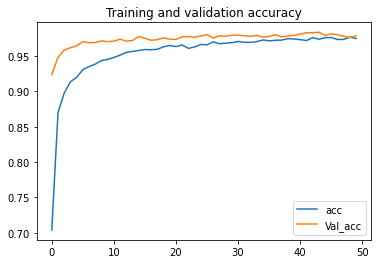

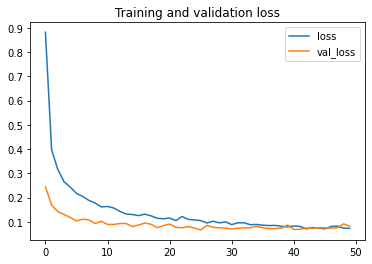

In [43]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = 'acc')
plt.plot(epochs, val_acc , label = 'Val_acc')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = 'loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.legend()
plt.title('Training and validation loss')